In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [ ]:
data =pd.read_csv('netflix_titles.csv')


In [ ]:
data['date_added']=pd.to_datetime(data['date_added'], format='%B %d, %Y')
data.sort_values('date_added')
data=data.set_index('date_added')
data=data.drop('show_id',axis=1)
data.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
date_added,,,,,,,,,,
2021-09-25,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2021-09-24,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2021-09-24,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2021-09-24,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
2021-09-24,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.shape

(8807, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8807 entries, 2021-09-25 to 2019-03-02
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   release_year  8807 non-null   int64 
 6   rating        8803 non-null   object
 7   duration      8804 non-null   object
 8   listed_in     8807 non-null   object
 9   description   8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 756.9+ KB


In [ ]:
data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
data['country']

date_added
2021-09-25    United States
2021-09-24     South Africa
2021-09-24              NaN
2021-09-24              NaN
2021-09-24            India
                  ...      
2019-11-20    United States
2019-07-01              NaN
2019-11-01    United States
2020-01-11    United States
2019-03-02            India
Name: country, Length: 8807, dtype: object

In [ ]:
data['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

Text(0.5, 1.0, 'Distribution of Movie/TV Show')

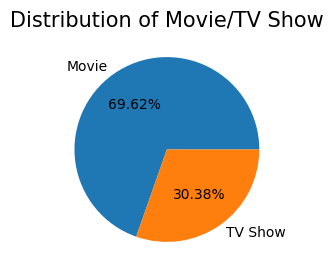

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.subplots(figsize = (3,3))
plt.pie(x=data["type"].value_counts(),labels=data["type"].value_counts().index , autopct= "%.2f%%" )
plt.title('Distribution of Movie/TV Show', size=15)


In [ ]:
data[data['type']=='Movie'].isnull().sum()

type              0
title             0
director        188
cast            475
country         440
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [ ]:
data[data['type']=='TV Show'].isnull().sum()

type               0
title              0
director        2446
cast             350
country          391
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
movie_type = ", ".join(data['listed_in'].dropna()).split(", ")

In [ ]:
len(movie_type)

19323

In [ ]:
movie_type_count = Counter(movie_type)
movie_type_count={k: v for k, v in sorted(movie_type_count.items(), key=lambda item: item[1],reverse=True)}

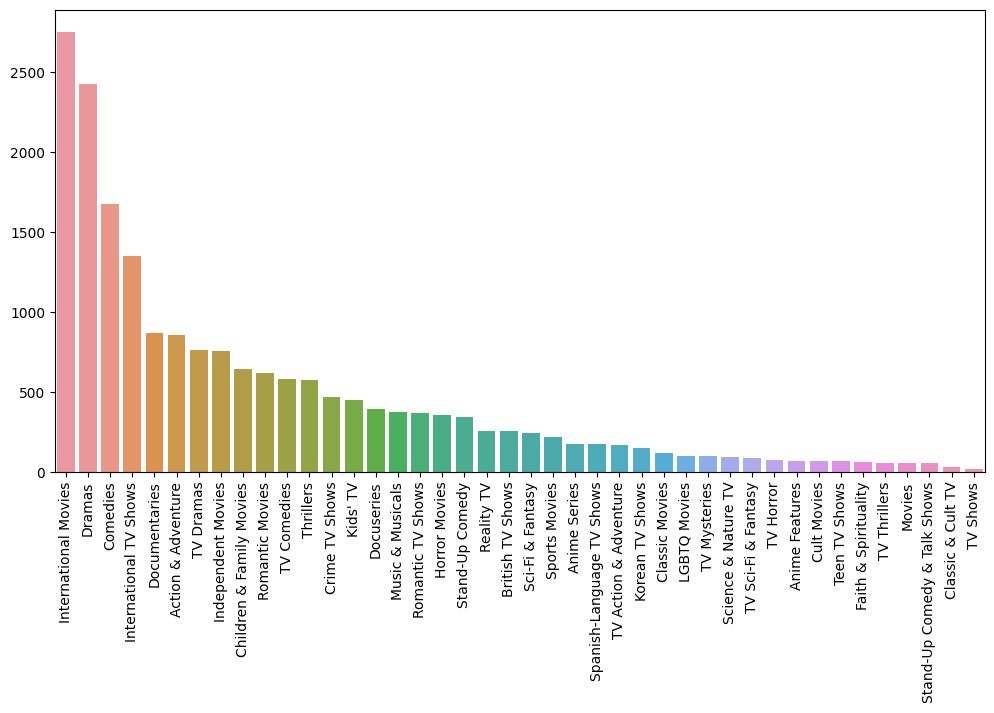

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(movie_type_count.keys()),y=list(movie_type_count.values()))
plt.xticks(rotation=90)
plt.show()

In [ ]:
country = ", ".join(data['country'].dropna()).split(', ')

In [ ]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

In [ ]:
country_with_code = {}
country_name = {}

In [ ]:
dict(Counter(country)).items()

dict_items([('United States', 3689), ('South Africa', 62), ('India', 1046), ('Ghana', 5), ('Burkina Faso', 1), ('United Kingdom', 804), ('Germany', 226), ('Ethiopia', 1), ('Czech Republic', 22), ('Mexico', 169), ('Turkey', 113), ('Australia', 160), ('France', 393), ('Finland', 11), ('China', 162), ('Canada', 445), ('Japan', 318), ('Nigeria', 103), ('Spain', 232), ('Belgium', 90), ('South Korea', 231), ('Singapore', 41), ('Italy', 100), ('Romania', 14), ('Argentina', 91), ('Venezuela', 4), ('Hong Kong', 105), ('Russia', 27), ('', 2), ('Ireland', 46), ('Nepal', 2), ('New Zealand', 33), ('Brazil', 97), ('Greece', 11), ('Jordan', 9), ('Colombia', 52), ('Switzerland', 19), ('Israel', 30), ('Taiwan', 89), ('Bulgaria', 10), ('Algeria', 3), ('Poland', 40), ('Saudi Arabia', 13), ('Thailand', 70), ('Indonesia', 90), ('Egypt', 117), ('Denmark', 48), ('Kuwait', 8), ('Netherlands', 50), ('Malaysia', 26), ('Vietnam', 7), ('Hungary', 11), ('Sweden', 42), ('Lebanon', 31), ('Syria', 3), ('Philippines',

In [ ]:
for c,v in dict(Counter(country)).items():
    if(c.lower() in (country_codes)):
        code=country_codes[c.lower()]
        country_with_code[code]=v
        country_name[c]=v

In [ ]:
fig = px.choropleth( locations=list(country_with_code.keys()),
                    color=list(country_with_code.values()),
                    hover_name=list(country_name.keys()),
                    )
fig.show()

In [ ]:
country_name={k: v for k, v in sorted(country_name.items(), key=lambda item: item[1],reverse=True)}
country_name_20=dict(list(country_name.items())[:20])
country_name_20

{'United States': 3689,
 'India': 1046,
 'United Kingdom': 804,
 'Canada': 445,
 'France': 393,
 'Japan': 318,
 'Spain': 232,
 'South Korea': 231,
 'Germany': 226,
 'Mexico': 169,
 'China': 162,
 'Australia': 160,
 'Egypt': 117,
 'Turkey': 113,
 'Hong Kong': 105,
 'Nigeria': 103,
 'Italy': 100,
 'Brazil': 97,
 'Argentina': 91,
 'Belgium': 90}

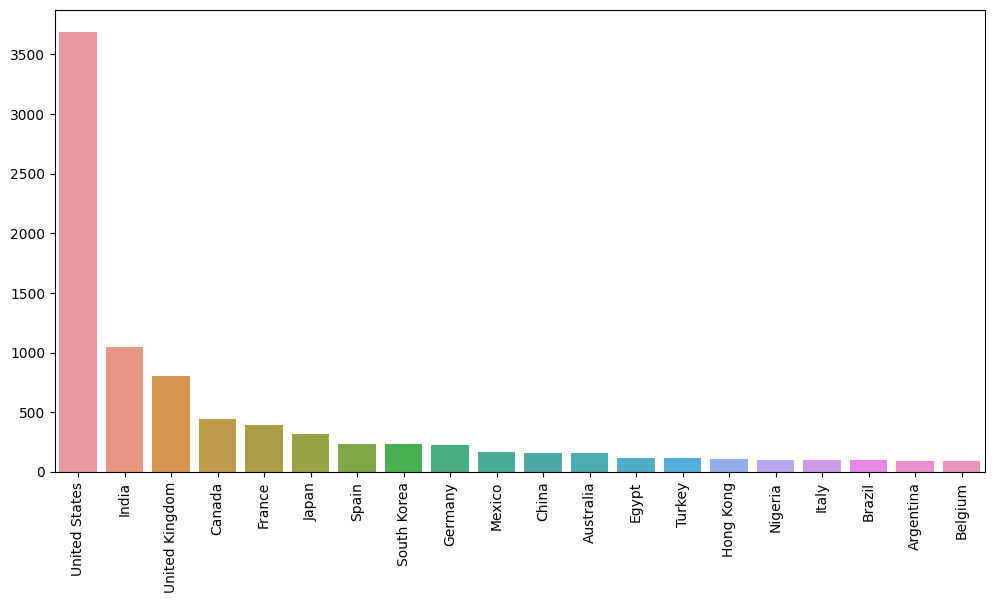

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(country_name_20.keys()),y=list(country_name_20.values()))
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

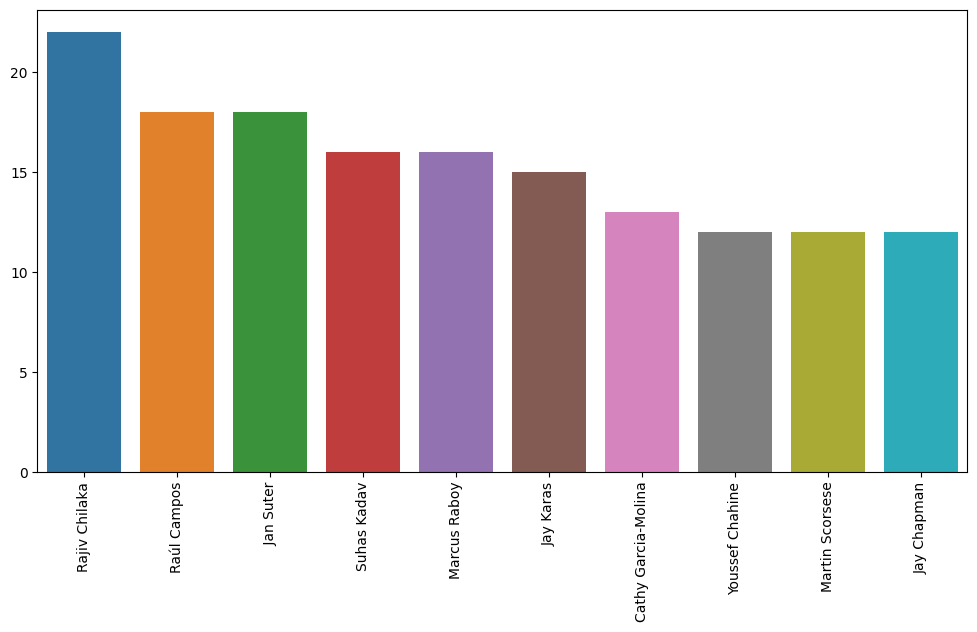

In [ ]:
director = ','.join(data['director'].dropna()).split(',')
director_name = Counter(director)
director_name1={k: v for k, v in sorted(director_name.items(), key=lambda item: item[1],reverse=True)}
director_name2=dict(list(director_name1.items())[:10])
plt.figure(figsize=(12,6))
sns.barplot(x=list(director_name2.keys()),y=list(director_name2.values()))
plt.xticks(rotation=90)
plt.show()

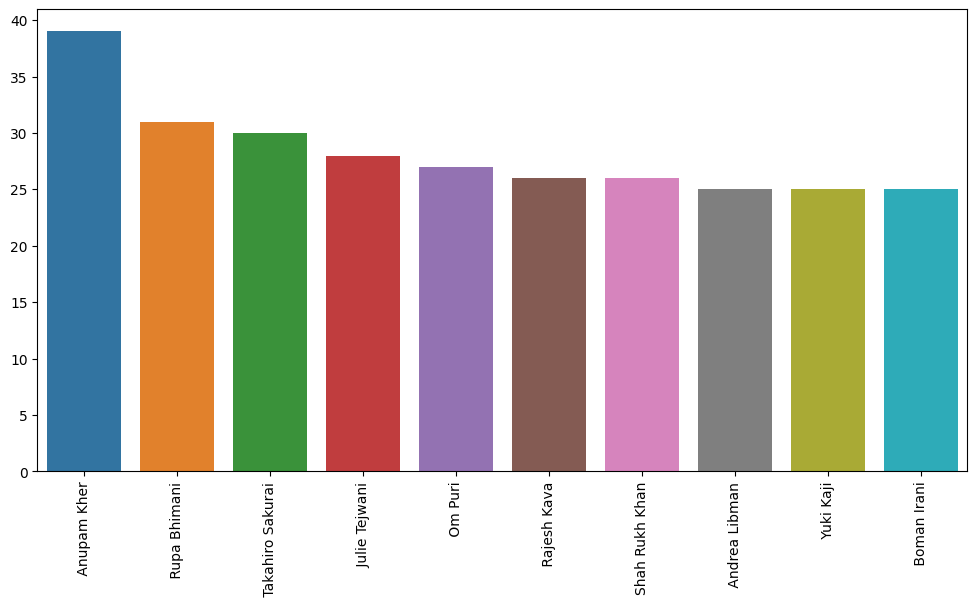

In [ ]:
cast = ','.join(data['cast'].dropna()).split(',')
cast_name = Counter(cast)
cast_name1={k: v for k, v in sorted(cast_name.items(), key=lambda item: item[1],reverse=True)}
cast_name2=dict(list(cast_name1.items())[:10])

plt.figure(figsize=(12,6))
sns.barplot(x=list(cast_name2.keys()),y=list(cast_name2.values()))
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'TREND OF RATING')

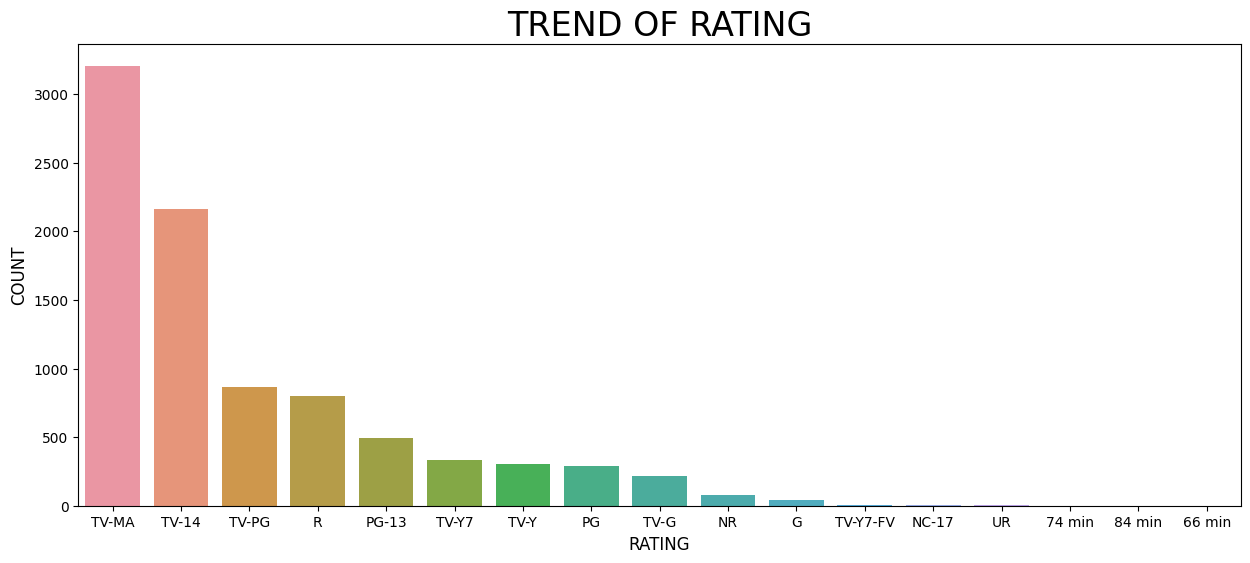

In [ ]:
plt.figure(figsize=(15,6))
temp= data.rating.value_counts()
sns.barplot(x="index" , y="rating" , data = temp.reset_index())
plt.xlabel("RATING", size=12)
plt.ylabel("COUNT", size=12)
plt.title("TREND OF RATING", size=24)

Text(0.5, 1.0, 'Release Frequency For 2016 - 2020')

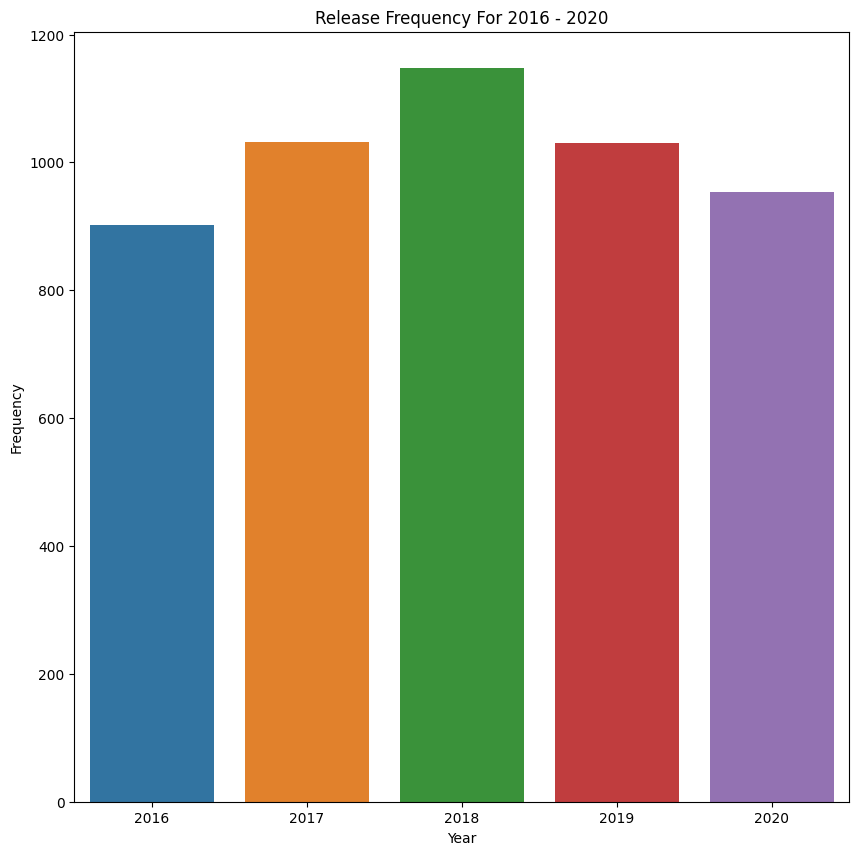

In [ ]:
ax = plt.subplots(figsize = (10,10))
sns.barplot(x = data['release_year'].value_counts().index[:5], y = data['release_year'].value_counts()[:5])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Release Frequency For 2016 - 2020')

# **visualization on disneyplus**
